In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from scipy.stats import linregress
import seaborn as sns

#Import API Key
from config import key
import os

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Generate lists for holding lat and long, and cities. 
lat_lngs = []
cities = []

#Create random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Iterate through list of cities to identity nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If it's a unique city, then add it to a ciies list
    
    if city not in cities:
        cities.append(city)
        
#Print the count of cities to confirm number of cities in database
len(cities)

626

In [3]:
#Perform API calls to check on temp, humidity, cloudiness, and wind speed in each city

#Use URL for weather map API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Build base URL
base_url = f"{url}appid={key}&units={units}&q="

#Create empty lists to hold weather and location data
clouds = []
winds = []
temp = []
humidity = []
country = []
lat = []
lng = []
city_list = []
date = [] 

#Start printing data
print("Gathering Data...")
print ("-----------------------------------------")
counter = 0
set_counter = 1

#Iterate through list of cities and perform request for data on each location
for city in cities:
    
    if counter > 10:
        counter = 1
        set_counter += 1
        
    else:
        counter += 1
    
    try:
        city_url = f'{base_url}{city.replace(" ","+")}'
        response = requests.get(city_url)
        print(f"Processing Record Number {counter} of Set Number {set_counter} | City of {city}")
        print(city_url)
        
        #Generate data for each weather element       
        data = response.json()
        time.sleep(1)
        clouds.append(data["clouds"]["all"])
        winds.append(data["wind"]["speed"])
        temp.append(data["main"]["temp_max"])
        humidity.append(data["main"]["humidity"])
        country.append(data["sys"]["country"])
        lat.append(data["coord"]["lat"])
        lng.append(data["coord"]["lon"])
        date.append(data["dt"])
        city_list.append(city)
        
    except:
        print("City not found. Skipping request.")
        
print("-------------\nData API Response Complete\n-------------------")
            

Gathering Data...
-----------------------------------------
Processing Record Number 1 of Set Number 1 | City of ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=ushuaia
Processing Record Number 2 of Set Number 1 | City of vaini
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=vaini
Processing Record Number 3 of Set Number 1 | City of hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=hithadhoo
Processing Record Number 4 of Set Number 1 | City of belmonte
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=belmonte
Processing Record Number 5 of Set Number 1 | City of guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=guerrero+negro
Processing Record Number 6 of Set Number 1 | City of mys shmidta
http://ap

Processing Record Number 3 of Set Number 5 | City of petropavlovskoye
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=petropavlovskoye
Processing Record Number 4 of Set Number 5 | City of fort nelson
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=fort+nelson
Processing Record Number 5 of Set Number 5 | City of puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=puerto+ayora
Processing Record Number 6 of Set Number 5 | City of kapaa
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=kapaa
Processing Record Number 7 of Set Number 5 | City of klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=klaksvik
Processing Record Number 8 of Set Number 5 | City of carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record Number 6 of Set Number 9 | City of skreia
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=skreia
Processing Record Number 7 of Set Number 9 | City of magadi
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=magadi
Processing Record Number 8 of Set Number 9 | City of santa isabel do rio negro
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=santa+isabel+do+rio+negro
Processing Record Number 9 of Set Number 9 | City of nuevitas
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=nuevitas
Processing Record Number 10 of Set Number 9 | City of luderitz
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=luderitz
Processing Record Number 11 of Set Number 9 | City of gat
http://api.openweathermap.org/data/2.5/weather?appid=64

Processing Record Number 8 of Set Number 13 | City of uyuni
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=uyuni
Processing Record Number 9 of Set Number 13 | City of soyo
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=soyo
Processing Record Number 10 of Set Number 13 | City of pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=pangnirtung
Processing Record Number 11 of Set Number 13 | City of olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=olafsvik
Processing Record Number 1 of Set Number 14 | City of lufilufi
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=lufilufi
Processing Record Number 2 of Set Number 14 | City of mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306

Processing Record Number 11 of Set Number 17 | City of geraldton
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=geraldton
Processing Record Number 1 of Set Number 18 | City of new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=new+norfolk
Processing Record Number 2 of Set Number 18 | City of vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=vaitupu
City not found. Skipping request.
Processing Record Number 3 of Set Number 18 | City of langenburg
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=langenburg
Processing Record Number 4 of Set Number 18 | City of general roca
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=general+roca
Processing Record Number 5 of Set Number 18 | City of naugarzan
http://api.openwea

Processing Record Number 3 of Set Number 22 | City of cacoal
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=cacoal
Processing Record Number 4 of Set Number 22 | City of garoua boulai
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=garoua+boulai
Processing Record Number 5 of Set Number 22 | City of rize
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=rize
Processing Record Number 6 of Set Number 22 | City of anloga
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=anloga
Processing Record Number 7 of Set Number 22 | City of verkhoyansk
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=verkhoyansk
Processing Record Number 8 of Set Number 22 | City of sampit
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306a

Processing Record Number 6 of Set Number 26 | City of port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=port+lincoln
Processing Record Number 7 of Set Number 26 | City of obigarm
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=obigarm
Processing Record Number 8 of Set Number 26 | City of teya
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=teya
Processing Record Number 9 of Set Number 26 | City of ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=ixtapa
Processing Record Number 10 of Set Number 26 | City of peace river
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=peace+river
Processing Record Number 11 of Set Number 26 | City of matagami
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e

Processing Record Number 9 of Set Number 30 | City of ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=ostrovnoy
Processing Record Number 10 of Set Number 30 | City of swift current
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=swift+current
Processing Record Number 11 of Set Number 30 | City of washougal
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=washougal
Processing Record Number 1 of Set Number 31 | City of mareeba
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=mareeba
Processing Record Number 2 of Set Number 31 | City of monticello
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=monticello
Processing Record Number 3 of Set Number 31 | City of ha giang
http://api.openweathermap.org/data/2.5/weather?appid=6

Processing Record Number 1 of Set Number 35 | City of slonim
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=slonim
Processing Record Number 2 of Set Number 35 | City of makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=makakilo+city
Processing Record Number 3 of Set Number 35 | City of guanaja
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=guanaja
Processing Record Number 4 of Set Number 35 | City of chumikan
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=chumikan
Processing Record Number 5 of Set Number 35 | City of dingle
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=dingle
Processing Record Number 6 of Set Number 35 | City of waipawa
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306

City not found. Skipping request.
Processing Record Number 4 of Set Number 39 | City of mahibadhoo
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=mahibadhoo
Processing Record Number 5 of Set Number 39 | City of tromso
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=tromso
Processing Record Number 6 of Set Number 39 | City of kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=kavaratti
Processing Record Number 7 of Set Number 39 | City of xining
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=xining
Processing Record Number 8 of Set Number 39 | City of la ronge
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=la+ronge
Processing Record Number 9 of Set Number 39 | City of shirokiy
http://api.openweathermap.org/data/2.5/w

Processing Record Number 7 of Set Number 43 | City of natal
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=natal
Processing Record Number 8 of Set Number 43 | City of akureyri
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=akureyri
Processing Record Number 9 of Set Number 43 | City of port-de-paix
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=port-de-paix
City not found. Skipping request.
Processing Record Number 10 of Set Number 43 | City of katsuura
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=katsuura
Processing Record Number 11 of Set Number 43 | City of gorontalo
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=gorontalo
Processing Record Number 1 of Set Number 44 | City of oviedo
http://api.openweathermap.org/data

Processing Record Number 10 of Set Number 47 | City of vredendal
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=vredendal
Processing Record Number 11 of Set Number 47 | City of chifeng
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=chifeng
Processing Record Number 1 of Set Number 48 | City of aasiaat
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=aasiaat
Processing Record Number 2 of Set Number 48 | City of bonavista
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=bonavista
Processing Record Number 3 of Set Number 48 | City of freeport
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=freeport
Processing Record Number 4 of Set Number 48 | City of ylivieska
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641

Processing Record Number 2 of Set Number 52 | City of rafaela
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=rafaela
Processing Record Number 3 of Set Number 52 | City of ahuimanu
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=ahuimanu
Processing Record Number 4 of Set Number 52 | City of kimbe
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=kimbe
Processing Record Number 5 of Set Number 52 | City of beni
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=beni
Processing Record Number 6 of Set Number 52 | City of beterou
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=beterou
Processing Record Number 7 of Set Number 52 | City of syamzha
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units

Processing Record Number 5 of Set Number 56 | City of saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=saint-pierre
Processing Record Number 6 of Set Number 56 | City of dicabisagan
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=dicabisagan
Processing Record Number 7 of Set Number 56 | City of fergus falls
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=fergus+falls
Processing Record Number 8 of Set Number 56 | City of sarab
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=sarab
Processing Record Number 9 of Set Number 56 | City of povenets
http://api.openweathermap.org/data/2.5/weather?appid=64c68a43aa2d9641e306ae8a060415cb&units=metric&q=povenets
Processing Record Number 10 of Set Number 56 | City of kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?appid

Convert city weather records to raw dataframe.

In [4]:
#print(cloudiness)
print(len(city_list))
print(len(clouds))
print(len(country))   
print(len(date))         
print(len(humidity))   
print(len(lat))    
print(len(lng))       
print(len(temp))    
print(len(winds))

572
572
572
572
572
572
572
572
572


In [21]:
weatherpy= {"City": city_list, "Country": country, "Date": date, "Lat": lat, "Long": lng, "Max Temp": temp, "Humidity": humidity, "Cloudiness": clouds, "Wind Speed": winds}

weatherpy_df = pd.DataFrame(weatherpy)

weatherpy_df.head()

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,ushuaia,AR,1619045520,-54.8000,-68.3000,9.00,49,0,2.06
1,vaini,TO,1619045568,-21.2000,-175.2000,29.00,74,40,2.06
2,hithadhoo,MV,1619045570,-0.6000,73.0833,27.89,69,43,2.20
3,belmonte,BR,1619045571,-15.8631,-38.8828,26.00,83,75,4.12
4,guerrero negro,MX,1619045573,27.9769,-114.0611,17.81,61,59,7.61


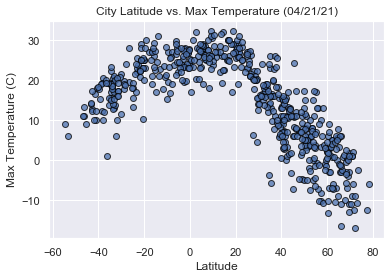

In [22]:
plt.scatter(weatherpy_df['Lat'], 
            weatherpy_df['Max Temp'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (C)')
plt.grid(True)
sns.set()

plt.savefig("City Latitude vs. Max Temperature.png")

plt.show()


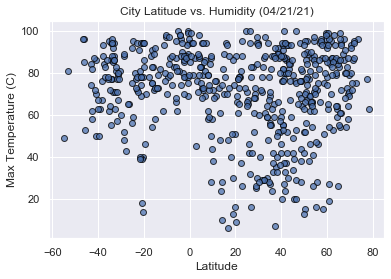

In [23]:
plt.scatter(weatherpy_df['Lat'], 
            weatherpy_df['Humidity'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (C)')
plt.grid(True)
sns.set()

plt.savefig("City Latitude vs. Humidity.png")

plt.show()

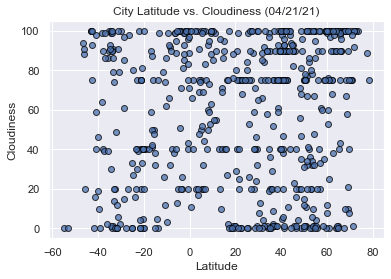

In [24]:
plt.scatter(weatherpy_df['Lat'], 
            weatherpy_df['Cloudiness'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness')
plt.grid(True)
sns.set()

plt.savefig("City Latitude vs. Cloudiness.png")

plt.show()

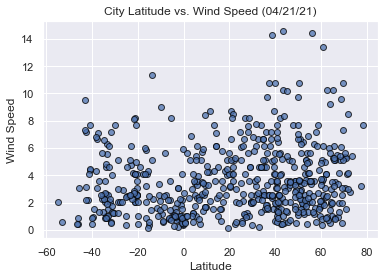

In [25]:
plt.scatter(weatherpy_df['Lat'], 
            weatherpy_df['Wind Speed'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.grid(True)
sns.set()

plt.savefig("City Latitude vs. Wind Speed.png")

plt.show()

In [26]:
northern_hemisphere = weatherpy_df.loc[(weatherpy_df["Lat"]>=0)]
southern_hemisphere = weatherpy_df.loc[(weatherpy_df["Lat"]<=0)]

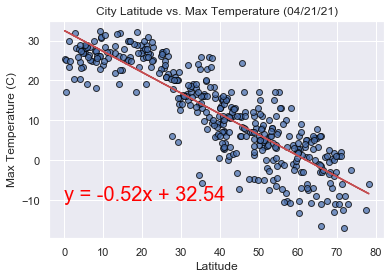

In [27]:
plt.scatter(northern_hemisphere['Lat'], 
            northern_hemisphere['Max Temp'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (C)')
plt.grid(True)
sns.set()

x = northern_hemisphere['Lat']
y = northern_hemisphere['Max Temp'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(0, -10), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Max Temperature - Nothern Hemisphere.png")

plt.show()


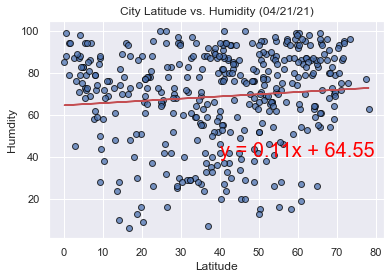

In [28]:
plt.scatter(northern_hemisphere['Lat'], 
            northern_hemisphere['Humidity'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Humdity')
plt.grid(True)
sns.set()

x = northern_hemisphere['Lat']
y = northern_hemisphere['Humidity'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(40, 40), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Humidity - Nothern Hemisphere.png")

plt.show()

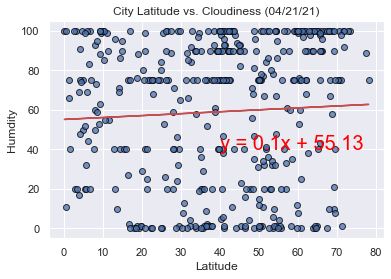

In [29]:
plt.scatter(northern_hemisphere['Lat'], 
            northern_hemisphere['Cloudiness'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Humdity')
plt.grid(True)
sns.set()

x = northern_hemisphere['Lat']
y = northern_hemisphere['Cloudiness'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(40, 40), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Cloudiness - Nothern Hemisphere.png")

plt.show()

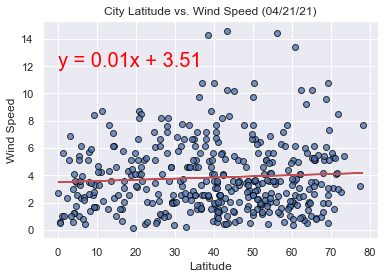

In [30]:
plt.scatter(northern_hemisphere['Lat'], 
            northern_hemisphere['Wind Speed'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.grid(True)
sns.set()

x = northern_hemisphere['Lat']
y = northern_hemisphere['Wind Speed'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(0, 12), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Wind Speed - Nothern Hemisphere.png")

plt.show()

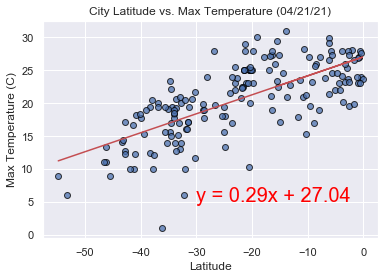

In [31]:
plt.scatter(southern_hemisphere['Lat'], 
            southern_hemisphere['Max Temp'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (C)')
plt.grid(True)
sns.set()

x = southern_hemisphere['Lat']
y = southern_hemisphere['Max Temp'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(-30, 5), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Max Temperature - Southern Hemisphere.png")

plt.show()


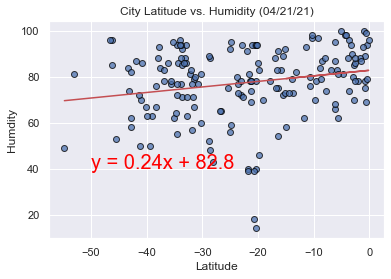

In [32]:
plt.scatter(southern_hemisphere['Lat'], 
            southern_hemisphere['Humidity'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Humdity')
plt.grid(True)
sns.set()

x = southern_hemisphere['Lat']
y = southern_hemisphere['Humidity'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(-50, 40), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Humidity - Southern Hemisphere.png")

plt.show()

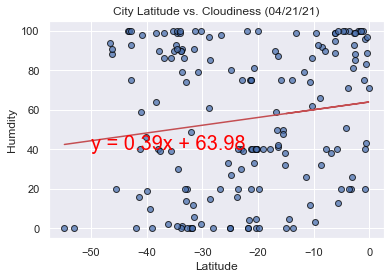

In [33]:
plt.scatter(southern_hemisphere['Lat'], 
            southern_hemisphere['Cloudiness'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Humdity')
plt.grid(True)
sns.set()

x = southern_hemisphere['Lat']
y = southern_hemisphere['Cloudiness'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(-50, 40), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Cloudiness - Southern Hemisphere.png")

plt.show()

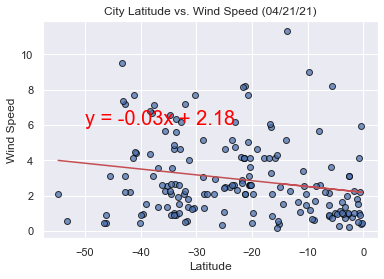

In [34]:
plt.scatter(southern_hemisphere['Lat'], 
            southern_hemisphere['Wind Speed'], 
            alpha = 0.75, 
            edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.grid(True)
sns.set()

x = southern_hemisphere['Lat']
y = southern_hemisphere['Wind Speed'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis,(-50, 6), color = "red", fontsize = 20)

plt.savefig("Linear Regreesion of City Latitude vs. Wind Speed - Southern Hemisphere.png")

plt.show()

In [35]:
weatherpy_df.to_csv("../cities_weather.csv")